In [ ]:
!pip install hyperactive
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
from google.colab import files
import os


In [ ]:
! pip install -q kaggle
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d kaustubhb999/tomatoleaf -p /content/images/ --unzip

 93% 166M/179M [00:01<00:00, 149MB/s]
100% 179M/179M [00:01<00:00, 137MB/s]


In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
np.random.seed(1)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(2)


import albumentations as albu
from albumentations import Compose, ShiftScaleRotate, Resize
from albumentations.pytorch.transforms import ToTensor, ToTensorV2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

import shutil


In [ ]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 3

In [ ]:
base_train = "/content/images/tomato/train"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")

print(len(Bacterial_spot))
print(len(Early_blight))
print(len(Late_blight))
print(len(Leaf_mold))
print(len(Septoria_leaf_spot))
print(len(Spider_mites))
print(len(Target_Spot))
print(len(Tomato_Yellow_Leaf_Curl_Virus))
print(len(Mosaic_virus))
print(len(Healthy))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [ ]:

base_train = "/content/images/tomato/val"

Bacterial_spot_val = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight_val = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight_val = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold_val = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot_val = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites_val = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot_val = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus_val = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus_val = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy_val = os.listdir(base_train + "/Tomato___healthy")

print(len(Bacterial_spot_val))
print(len(Early_blight_val))
print(len(Late_blight_val))
print(len(Leaf_mold_val))
print(len(Septoria_leaf_spot_val))
print(len(Spider_mites_val))
print(len(Target_Spot_val))
print(len(Tomato_Yellow_Leaf_Curl_Virus_val))
print(len(Mosaic_virus_val))
print(len(Healthy))

100
100
100
100
100
100
100
100
100
1000


In [ ]:
# Create the train and val sets

df_Bacterial_spot_train = pd.DataFrame(Bacterial_spot, columns=['image'])
df_Bacterial_spot_train['target'] = 'Bacterial_spot'

df_Early_blight_train = pd.DataFrame(Early_blight, columns=['image'])
df_Early_blight_train['target'] = 'Early_blight'

df_Late_blight_train = pd.DataFrame(Late_blight, columns=['image'])
df_Late_blight_train['target'] = 'Late_blight'

df_Leaf_mold_train = pd.DataFrame(Leaf_mold, columns=['image'])
df_Leaf_mold_train['target'] = 'Leaf_mold'

df_Septoria_leaf_spot_train = pd.DataFrame(Septoria_leaf_spot, columns=['image'])
df_Septoria_leaf_spot_train['target'] = 'Septoria_leaf_spot'

df_Spider_mites_train = pd.DataFrame(Spider_mites, columns=['image'])
df_Spider_mites_train['target'] = 'Spider_mites'

df_Target_Spot_train = pd.DataFrame(Target_Spot, columns=['image'])
df_Target_Spot_train['target'] = 'Target_Spot'

df_Tomato_Yellow_Leaf_Curl_Virus_train = pd.DataFrame(Tomato_Yellow_Leaf_Curl_Virus, columns=['image'])
df_Tomato_Yellow_Leaf_Curl_Virus_train['target'] = 'Tomato_Yellow_Leaf_Curl_Virus'

df_Mosaic_virus_train = pd.DataFrame(Mosaic_virus, columns=['image'])
df_Mosaic_virus_train['target'] = 'Mosaic_virus'

df_Healthy_train = pd.DataFrame(Healthy, columns=['image'])
df_Healthy_train['target'] = 'Healthy'



# Sample 5 validation images from each class


print(len(df_Bacterial_spot_train))
print(len(df_Early_blight_train))
print(len(df_Late_blight_train))
print(len(df_Leaf_mold_train))
print(len(df_Septoria_leaf_spot_train))
print(len(df_Spider_mites_train))
print(len(df_Target_Spot_train))
print(len(df_Tomato_Yellow_Leaf_Curl_Virus_train))
print(len(df_Mosaic_virus_train))
print(len(df_Healthy_train))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [ ]:
# Create the train and val sets

df_Bacterial_spot_val = pd.DataFrame(Bacterial_spot_val, columns=['image'])
df_Bacterial_spot_val['target'] = 'Bacterial_spot'

df_Early_blight_val = pd.DataFrame(Early_blight_val, columns=['image'])
df_Early_blight_val['target'] = 'Early_blight'

df_Late_blight_val = pd.DataFrame(Late_blight_val, columns=['image'])
df_Late_blight_val['target'] = 'Late_blight'

df_Leaf_mold_val = pd.DataFrame(Leaf_mold_val, columns=['image'])
df_Leaf_mold_val['target'] = 'Leaf_mold'

df_Septoria_leaf_spot_val = pd.DataFrame(Septoria_leaf_spot_val, columns=['image'])
df_Septoria_leaf_spot_val['target'] = 'Septoria_leaf_spot'

df_Spider_mites_val = pd.DataFrame(Spider_mites_val, columns=['image'])
df_Spider_mites_val['target'] = 'Spider_mites'

df_Target_Spot_val = pd.DataFrame(Target_Spot_val, columns=['image'])
df_Target_Spot_val['target'] = 'Target_Spot'

df_Tomato_Yellow_Leaf_Curl_Virus_val = pd.DataFrame(Tomato_Yellow_Leaf_Curl_Virus_val, columns=['image'])
df_Tomato_Yellow_Leaf_Curl_Virus_val['target'] = 'Tomato_Yellow_Leaf_Curl_Virus'

df_Mosaic_virus_val = pd.DataFrame(Mosaic_virus_val, columns=['image'])
df_Mosaic_virus_val['target'] = 'Mosaic_virus'

df_Healthy_val = pd.DataFrame(Healthy_val, columns=['image'])
df_Healthy_val['target'] = 'Healthy'



# Sample 5 validation images from each class


print(len(df_Bacterial_spot_val))
print(len(df_Early_blight_val))
print(len(df_Late_blight_val))
print(len(df_Leaf_mold_val))
print(len(df_Septoria_leaf_spot_val))
print(len(df_Spider_mites_val))
print(len(df_Target_Spot_val))
print(len(df_Tomato_Yellow_Leaf_Curl_Virus_val))
print(len(df_Mosaic_virus_val))
print(len(df_Healthy_val))

100
100
100
100
100
100
100
100
100
100


In [ ]:
df_train = pd.concat([df_Bacterial_spot_train, \
                     df_Early_blight_train, \
                     df_Late_blight_train, \
                     df_Leaf_mold_train, \
                     df_Septoria_leaf_spot_train, \
                     df_Spider_mites_train, \
                     df_Target_Spot_train, \
                     df_Tomato_Yellow_Leaf_Curl_Virus_train, \
                     df_Mosaic_virus_train, \
                     df_Healthy_train], axis=0).reset_index(drop=True)

df_val = pd.concat([df_Bacterial_spot_val, \
                     df_Early_blight_val, \
                     df_Late_blight_val, \
                     df_Leaf_mold_val, \
                     df_Septoria_leaf_spot_val, \
                     df_Spider_mites_val, \
                     df_Target_Spot_val, \
                     df_Tomato_Yellow_Leaf_Curl_Virus_val, \
                     df_Mosaic_virus_val, \
                     df_Healthy_val], axis=0).reset_index(drop=True)

#df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

#print(df_data.shape)
print(df_train.shape)
print(df_val.shape)

(10000, 2)
(1000, 2)


In [ ]:
df_train['target'].value_counts()

Healthy                          1000
Leaf_mold                        1000
Septoria_leaf_spot               1000
Spider_mites                     1000
Mosaic_virus                     1000
Late_blight                      1000
Early_blight                     1000
Target_Spot                      1000
Tomato_Yellow_Leaf_Curl_Virus    1000
Bacterial_spot                   1000
Name: target, dtype: int64

In [ ]:
df_val['target'].value_counts()

Healthy                          100
Mosaic_virus                     100
Early_blight                     100
Late_blight                      100
Septoria_leaf_spot               100
Leaf_mold                        100
Target_Spot                      100
Tomato_Yellow_Leaf_Curl_Virus    100
Bacterial_spot                   100
Spider_mites                     100
Name: target, dtype: int64

In [ ]:
# Create the target as index values

# combine val, train and test
val_len = len(df_val)
train_len = len(df_train)
df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)

# create the dummy variables
df_combined = pd.get_dummies(df_combined, columns=['target'])

# separate the train and val sets
df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(10000, 11)
(1000, 11)


In [ ]:
df_combined.head()


,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
0,0d3691ab-5413-4313-870e-9e5d2faf33ea___RS_HL 9...,0,0,1,0,0,0,0,0,0,0
1,Tomato___Tomato_mosaic_virus_original_0a7cc59f...,0,0,0,0,0,1,0,0,0,0
2,0ecc2ee7-fb66-41fa-a23b-9bdeaf31078a___RS_Erly...,0,1,0,0,0,0,0,0,0,0
3,1a473cad-42fc-48ca-963c-d438fbca928f___RS_Late...,0,0,0,1,0,0,0,0,0,0
4,1e1aa3d8-d12f-47e1-b316-b8656ab3f2b6___RS_HL 0...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_train.head()

,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
1000,d76f5b4a-9205-4a14-9181-5d3add326231___GH_HL L...,0,0,1,0,0,0,0,0,0,0
1001,ea19d516-b7fd-45c3-a459-68281f3bd9aa___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1002,f9b31399-e5b4-4573-9fd3-9bf2079478c5___JR_Sept...,0,0,0,0,0,0,1,0,0,0
1003,b190b148-9621-404b-a3a1-e697d2d40f42___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1004,57649e25-07c1-4435-9084-6da48a1cc72f___Com.G_S...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_val.head()

,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
0,0d3691ab-5413-4313-870e-9e5d2faf33ea___RS_HL 9...,0,0,1,0,0,0,0,0,0,0
1,Tomato___Tomato_mosaic_virus_original_0a7cc59f...,0,0,0,0,0,1,0,0,0,0
2,0ecc2ee7-fb66-41fa-a23b-9bdeaf31078a___RS_Erly...,0,1,0,0,0,0,0,0,0,0
3,1a473cad-42fc-48ca-963c-d438fbca928f___RS_Late...,0,0,0,1,0,0,0,0,0,0
4,1e1aa3d8-d12f-47e1-b316-b8656ab3f2b6___RS_HL 0...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

In [ ]:
import albumentations as albu


def augment_image(augmentation, image):
    # get the transform as a dict
    aug_image_dict =  augmentation(image=image)
    # retrieve the augmented matrix of the image
    image_matrix = aug_image_dict['image']


    return image_matrix

In [ ]:
# Define the transforms


aug_types = albu.Compose([
            albu.HorizontalFlip(),
             albu.OneOf([
                albu.HorizontalFlip(),
                albu.VerticalFlip(),
                ], p=0.8),
            albu.OneOf([
                albu.RandomContrast(),
                albu.RandomGamma(),
                albu.RandomBrightness(),
                ], p=0.3),
            albu.OneOf([
                albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                albu.GridDistortion(),
                albu.OpticalDistortion(distort_limit=2, shift_limit=0.5),
                ], p=0.3),
            albu.ShiftScaleRotate()
            ])

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [ ]:
image_dir = 'image_dir'
os.mkdir(image_dir)

!ls

df_combined.csv.gz  df_train.csv.gz  df_val.csv.gz  image_dir  images  kaggle.json  sample_data


In [ ]:
base_train = "/content/images/tomato/train"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")



# Transfer the Bacterial_spot images
for fname in Bacterial_spot:

    path = base_train + "/Tomato___Bacterial_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Early_blight images
for fname in Early_blight:

    path = base_train + "/Tomato___Early_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Late_blight images
for fname in Late_blight:

    path = base_train + "/Tomato___Late_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Leaf_mold images
for fname in Leaf_mold:

    path = base_train + "/Tomato___Leaf_Mold"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Septoria_leaf_spot images
for fname in Septoria_leaf_spot:

    path = base_train + "/Tomato___Septoria_leaf_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Spider_mites images
for fname in Spider_mites:

    path = base_train + "/Tomato___Spider_mites Two-spotted_spider_mite"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Target_Spot images
for fname in Target_Spot:

    path = base_train + "/Tomato___Target_Spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Tomato_Yellow_Leaf_Curl_Virus images
for fname in Tomato_Yellow_Leaf_Curl_Virus:

    path = base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Mosaic_virus images
for fname in Mosaic_virus:

    path = base_train + "/Tomato___Tomato_mosaic_virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Healthy images
for fname in Healthy:

    path = base_train + "/Tomato___healthy"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [ ]:
base_train = "/content/images/tomato/val"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")



# Transfer the Bacterial_spot images
for fname in Bacterial_spot:

    path = base_train + "/Tomato___Bacterial_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Early_blight images
for fname in Early_blight:

    path = base_train + "/Tomato___Early_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Late_blight images
for fname in Late_blight:

    path = base_train + "/Tomato___Late_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Leaf_mold images
for fname in Leaf_mold:

    path = base_train + "/Tomato___Leaf_Mold"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Septoria_leaf_spot images
for fname in Septoria_leaf_spot:

    path = base_train + "/Tomato___Septoria_leaf_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Spider_mites images
for fname in Spider_mites:

    path = base_train + "/Tomato___Spider_mites Two-spotted_spider_mite"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Target_Spot images
for fname in Target_Spot:

    path = base_train + "/Tomato___Target_Spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Tomato_Yellow_Leaf_Curl_Virus images
for fname in Tomato_Yellow_Leaf_Curl_Virus:

    path = base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Mosaic_virus images
for fname in Mosaic_virus:

    path = base_train + "/Tomato___Tomato_mosaic_virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Healthy images
for fname in Healthy:

    path = base_train + "/Tomato___healthy"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


In [ ]:
len(os.listdir('image_dir'))

11000

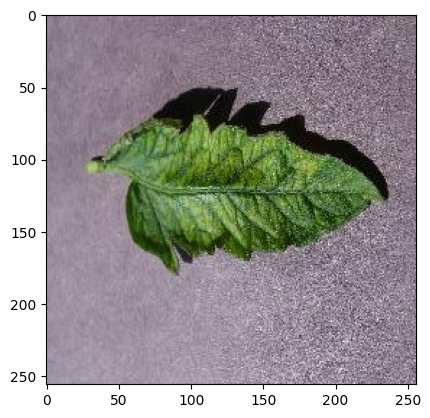

In [ ]:

import matplotlib.pyplot as plt
# Get an image to test transformations

# get a list of train png images
path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[1]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)

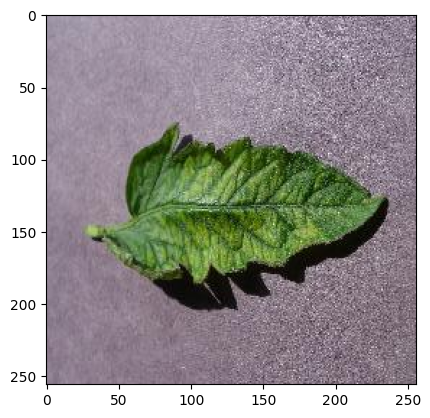

In [ ]:
# Test the transformation setup.
# The image will be different each time this cell is run.

aug_image = augment_image(aug_types, image)

plt.imshow(aug_image)

In [ ]:
df_train.head()

,image,target_Bacterial_spot,target_Early_blight,target_Healthy,target_Late_blight,target_Leaf_mold,target_Mosaic_virus,target_Septoria_leaf_spot,target_Spider_mites,target_Target_Spot,target_Tomato_Yellow_Leaf_Curl_Virus
1000,d76f5b4a-9205-4a14-9181-5d3add326231___GH_HL L...,0,0,1,0,0,0,0,0,0,0
1001,ea19d516-b7fd-45c3-a459-68281f3bd9aa___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1002,f9b31399-e5b4-4573-9fd3-9bf2079478c5___JR_Sept...,0,0,0,0,0,0,1,0,0,0
1003,b190b148-9621-404b-a3a1-e697d2d40f42___Crnl_L....,0,0,0,0,1,0,0,0,0,0
1004,57649e25-07c1-4435-9084-6da48a1cc72f___Com.G_S...,0,0,0,0,0,0,0,1,0,0


In [ ]:
def train_generator(batch_size=8):

    while True:

        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):

            # get the list of images
            image_id_list = list(df['image'])

            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)




            # Create X_train
            #================

            for i in range(0, len(image_id_list)):


                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)

                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))




            # Create y_train
            # ===============
                cols = ["target_Bacterial_spot",
                        "target_Early_blight",
                        "target_Late_blight",
                        "target_Leaf_mold",
                        "target_Septoria_leaf_spot",
                        "target_Spider_mites",
                        "target_Target_Spot",
                        "target_Tomato_Yellow_Leaf_Curl_Virus",
                        "target_Mosaic_virus",
                        "target_Healthy",]
                y_train = df[cols]
                y_train = np.asarray(y_train)

                # change the shape to (batch_size, 1)
                #y_train = y_train.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size


            # Augment the image and mask
            # ===========================

                aug_image = augment_image(aug_types, image)

                # insert the image into X_train
                X_train[i] = aug_image



            # Normalize the images
            X_train = X_train/255

            yield X_train, y_train

In [ ]:

# Test the generator

# initialize
train_gen = train_generator(batch_size=8)

# run the generator
X_train, y_train = next(train_gen)

print(X_train.shape)
print(y_train.shape)

(8, 128, 128, 3)
(8, 10)


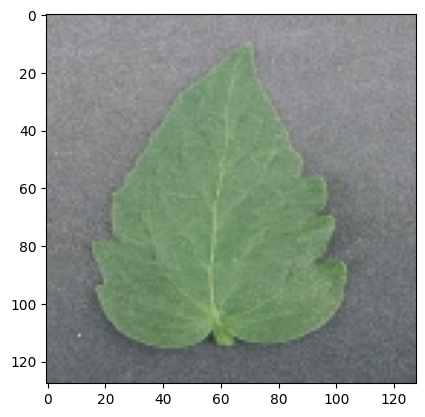

In [ ]:
# Print the first image in X_train
# Remember that train images have been augmented.

image = X_train[0,:,:,:]
plt.imshow(image)

In [ ]:
def val_generator(batch_size=5):

    while True:

        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):

            # get the list of images
            image_id_list = list(df['image'])

            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)




            # Create X_val
            #================

            for i in range(0, len(image_id_list)):


                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)

                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_val[i] = image




            # Create y_val
            # ===============

                cols = ["target_Bacterial_spot",
                        "target_Early_blight",
                        "target_Late_blight",
                        "target_Leaf_mold",
                        "target_Septoria_leaf_spot",
                        "target_Spider_mites",
                        "target_Target_Spot",
                        "target_Tomato_Yellow_Leaf_Curl_Virus",
                        "target_Mosaic_virus",
                        "target_Healthy",]
                y_val = df[cols]
                y_val = np.asarray(y_val)

                # change the shape to (batch_size, 1)
                #y_val = y_val.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size





            # Normalize the images
            X_val = X_val/255

            yield X_val, y_val

In [ ]:

# Test the validation generator

# initialize
val_gen = val_generator(batch_size=5)

# run the generator
X_val, y_val = next(val_gen)

print(X_val.shape)
print(y_val.shape)

(5, 128, 128, 3)
(5, 10)


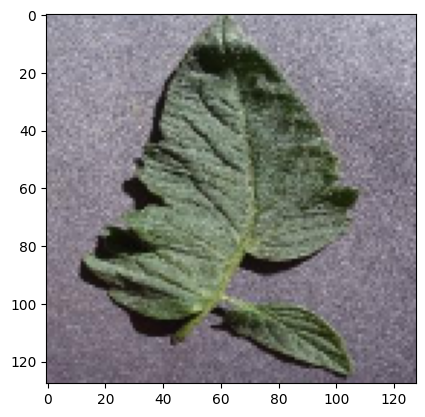

In [ ]:

# print the image from X_val
image = X_val[0,:,:,:]
plt.imshow(image)

In [ ]:
def test_generator(batch_size=1):

    while True:

        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):

            # get the list of images
            image_id_list = list(df['image'])

            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)




            # Create X_test
            #================

            for i in range(0, len(image_id_list)):


                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)

                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_test[i] = image



            # Normalize the images
            X_test = X_test/255

            yield X_test

In [ ]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=1)

# run the generator
X_test = next(test_gen)

print(X_test.shape)

(1, 128, 128, 3)


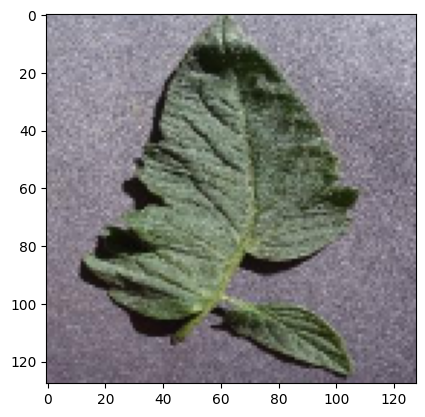

In [ ]:
# print the image from X_test

image = X_test[0,:,:,:]
plt.imshow(image)

In [ ]:
TRAIN_BATCH_SIZE = 8
VAL_BATCH_SIZE = 5
EPOCH = 10


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = TRAIN_BATCH_SIZE
val_batch_size = VAL_BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import os
import datetime
import cv2

from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1 import RunOptions

from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import LabelBinarizer
from hyperactive import Hyperactive

In [ ]:

model_pretrained = Sequential()
model_pretrained.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Conv2D(32, (3, 3)))
model_pretrained.add(Activation("relu"))
model_pretrained.add(MaxPooling2D(pool_size=(2, 2)))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Conv2D(32, (3, 3), padding="same"))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Flatten())
model_pretrained.add(Dense(200))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.5))
model_pretrained.add(Dense(10))
model_pretrained.add(Activation("softmax"))

In [ ]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model_pretrained.compile(
    Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "model_baseline.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                                   #verbose=1, mode='min')



log_fname = 'training_log.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [checkpoint, csv_logger]

In [ ]:
%%time
history = model_pretrained.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=EPOCH,
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)

Epoch 1/10


<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1250/1250 [==============================] - ETA: 0s - loss: 2.3092 - accuracy: 0.1139
Epoch 1: val_accuracy improved from -inf to 0.10200, saving model to model_baseline.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 77s 55ms/step - loss: 2.3092 - accuracy: 0.1139 - val_loss: 2.3021 - val_accuracy: 0.1020
Epoch 2/10
1249/1250 [============================>.] - ETA: 0s - loss: 2.2164 - accuracy: 0.1779
Epoch 2: val_accuracy improved from 0.10200 to 0.27700, saving model to model_baseline.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 70s 56ms/step - loss: 2.2165 - accuracy: 0.1779 - val_loss: 2.0392 - val_accuracy: 0.2770
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 1.7768 - accuracy: 0.3751
Epoch 3: val_accuracy improved from 0.27700 to 0.45200, saving model to model_baseline.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 67s 54ms/step - loss: 1.7768 - accuracy: 0.3751 - val_loss: 1.6063 - val_accuracy: 0.4520
Epoch 4/10
1249/1250 [============================>.] - ETA: 0s - loss: 1.4277 - accuracy: 0.5026
Epoch 4: val_accuracy improved from 0.45200 to 0.60200, saving model to model_baseline.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 69s 55ms/step - loss: 1.4279 - accuracy: 0.5023 - val_loss: 1.1347 - val_accuracy: 0.6020
Epoch 5/10
1249/1250 [============================>.] - ETA: 0s - loss: 1.2606 - accuracy: 0.5612
Epoch 5: val_accuracy did not improve from 0.60200
1250/1250 [==============================] - 64s 51ms/step - loss: 1.2611 - accuracy: 0.5611 - val_loss: 1.2068 - val_accuracy: 0.5700
Epoch 6/10
1250/1250 [==============================] - ETA: 0s - loss: 1.1456 - accuracy: 0.5983
Epoch 6: val_accuracy did not improve from 0.60200
1250/1250 [==============================] - 62s 49ms/step - loss: 1.1456 - accuracy: 0.5983 - val_loss: 1.2548 - val_accuracy: 0.5530
Epoch 7/10
1250/1250 [==============================] - ETA: 0s - loss: 1.1071 - accuracy: 0.6206
Epoch 7: val_accuracy did not improve from 0.60200
1250/1250 [==============================] - 62s 49ms/step - loss: 1.1071 - accuracy: 0.6206 - val_loss: 1.0841 - val_accuracy: 0.6010
Epoch 8/10
12

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 70s 56ms/step - loss: 1.0539 - accuracy: 0.6306 - val_loss: 1.0130 - val_accuracy: 0.6310
Epoch 9/10
1249/1250 [============================>.] - ETA: 0s - loss: 1.0165 - accuracy: 0.6485
Epoch 9: val_accuracy improved from 0.63100 to 0.68800, saving model to model_baseline.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 63s 50ms/step - loss: 1.0166 - accuracy: 0.6484 - val_loss: 0.8782 - val_accuracy: 0.6880
Epoch 10/10
1249/1250 [============================>.] - ETA: 0s - loss: 0.9784 - accuracy: 0.6609
Epoch 10: val_accuracy did not improve from 0.68800
1250/1250 [==============================] - 64s 51ms/step - loss: 0.9788 - accuracy: 0.6607 - val_loss: 0.9107 - val_accuracy: 0.6860
CPU times: user 13min 7s, sys: 34.1 s, total: 13min 41s
Wall time: 11min 6s


In [ ]:
model_pretrained = Sequential()
model_pretrained.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Conv2D(32, (3, 3)))
model_pretrained.add(Activation("relu"))
model_pretrained.add(MaxPooling2D(pool_size=(2, 2)))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Conv2D(32, (3, 3), padding="same"))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Flatten())
model_pretrained.add(Dense(200))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.5))
model_pretrained.add(Dense(10))
model_pretrained.add(Activation("softmax"))

In [ ]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model_pretrained.compile(
    Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "pretrained_model.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                                   #verbose=1, mode='min')

log_fname = 'training_log_pretrained.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [csv_logger]

In [ ]:
%%time
history = model_pretrained.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=EPOCH,
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)

In [ ]:
n_layers = len(model_pretrained.layers)

for i in range(n_layers - 8):
    model_pretrained.pop()

for layer in model_pretrained.layers:
    layer.trainable = False

print(model_pretrained.summary())

model_pretrained.save(filepath)